<a href="https://colab.research.google.com/github/Kushcodingexe/Data-Science-FDS-Course/blob/main/Kush_Sahni_2210110371_FDS_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#1
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

df = pd.read_csv("loan.csv")
print("Initial shape:", df.shape)
print("Null counts:\n", df.isnull().sum())

# Fill missing values: numeric (median), LoanAmount (mean as asked), categorical (mode)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
for c in ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']:
    if c in df.columns: df[c].fillna(df[c].median(), inplace=True)
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for c in cat_cols:
    if c in df.columns: df[c].fillna(df[c].mode()[0], inplace=True)

# Credit_History often numeric but treat missing -> mode
if 'Credit_History' in df.columns: df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

print("\nAfter fill nulls:\n", df.isnull().sum())
df.head()


Initial shape: (614, 13)
Null counts:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

After fill nulls:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-118789069.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
/tmp/ipython-input-118789069.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


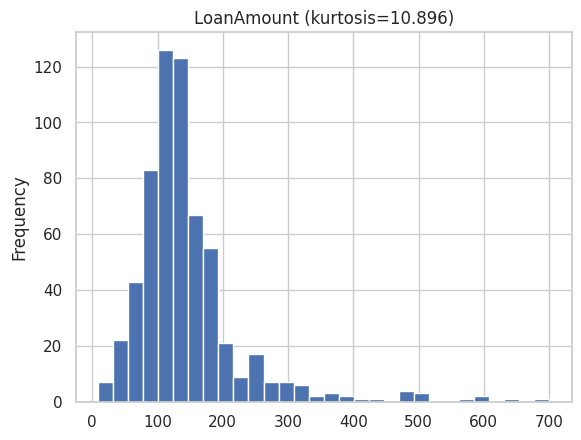

kurtosis = 10.8965


In [31]:
#2
k = df['LoanAmount'].kurtosis()
df['LoanAmount'].plot.hist(bins=30); plt.title(f"LoanAmount (kurtosis={k:.3f})"); plt.show()
print("kurtosis =", round(k,4))


             count        mean  median      skew  <lambda_0>
Loan_Status                                                 
N              192  150.945488   133.5  2.170045    6.553845
Y              422  144.349606   128.0  2.987803   13.010302


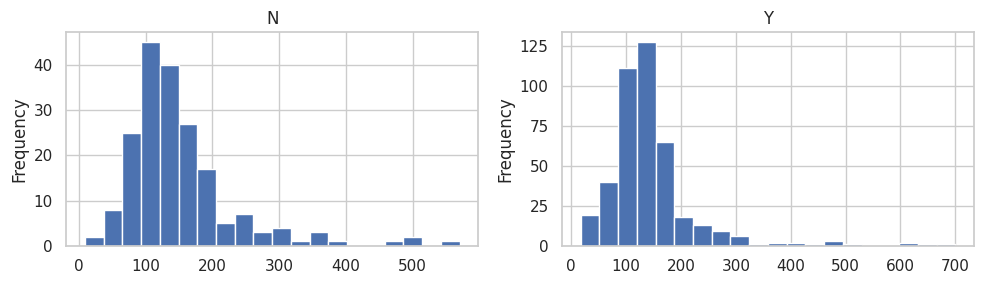

In [32]:
#3
print(df.groupby('Loan_Status')['LoanAmount'].agg(['count','mean','median','skew', lambda x: x.kurt()]))
fig,ax = plt.subplots(1,2,figsize=(10,3))
for a,(s,g) in zip(ax, df.groupby('Loan_Status')): g['LoanAmount'].plot.hist(bins=20,ax=a); a.set_title(s)
plt.tight_layout(); plt.show()

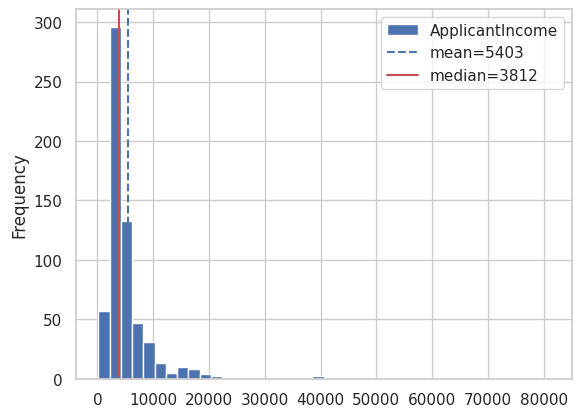

mean= 5403.46 median= 3812.5


In [33]:
#4
inc = df['ApplicantIncome'].dropna()
m,md = inc.mean(), inc.median()
inc.plot.hist(bins=40); plt.axvline(m, linestyle='--', label=f"mean={m:.0f}"); plt.axvline(md, color='r', label=f"median={md:.0f}")
plt.legend(); plt.show()
print("mean=",round(m,2),"median=",round(md,2))

In [34]:
#5
print(df.groupby('Gender')['ApplicantIncome'].mean())


Gender
Female    4643.473214
Male      5573.017928
Name: ApplicantIncome, dtype: float64


In [35]:
#6
print(df.groupby('Loan_Status')['LoanAmount'].agg(['mean','median','count']))


                   mean  median  count
Loan_Status                           
N            150.945488   133.5    192
Y            144.349606   128.0    422


In [36]:
#7
df['TotalIncome'] = df['ApplicantIncome'].fillna(0) + df['CoapplicantIncome'].fillna(0)
def iqr(s): return np.percentile(s,75)-np.percentile(s,25)
for name,ser in [('ApplicantIncome',df['ApplicantIncome']),('TotalIncome',df['TotalIncome'])]:
    s = ser.dropna()
    print(name, "mean",round(s.mean(),2),"std",round(s.std(),2),"IQR",round(iqr(s),2))


ApplicantIncome mean 5403.46 std 6109.04 IQR 2917.5
TotalIncome mean 7024.71 std 6458.66 IQR 3355.75


In [37]:
#8
for c in ['ApplicantIncome','CoapplicantIncome','TotalIncome']:
    s = df[c].dropna()
    print(c, "skew",round(s.skew(),3),"kurt",round(s.kurtosis(),3),"CV", round(s.std()/s.mean() if s.mean() else np.nan,3))


ApplicantIncome skew 6.54 kurt 60.541 CV 1.131
CoapplicantIncome skew 7.492 kurt 84.956 CV 1.805
TotalIncome skew 5.633 kurt 45.784 CV 0.919


In [38]:
#9
a = df['ApplicantIncome'].dropna()
q1,q3 = np.percentile(a,[25,75]); I = q3-q1
low,high = q1-1.5*I, q3+1.5*I
outs = df[(df['ApplicantIncome']<low)|(df['ApplicantIncome']>high)]['ApplicantIncome']
print("outliers count:", len(outs))
print("before mean,median:", round(a.mean(),2), round(a.median(),2))
df2 = df[~((df['ApplicantIncome']<low)|(df['ApplicantIncome']>high))]
print("after mean,median:", round(df2['ApplicantIncome'].mean(),2), round(df2['ApplicantIncome'].median(),2))


outliers count: 50
before mean,median: 5403.46 3812.5
after mean,median: 4124.72 3638.5


             count          var        std      skew  <lambda_0>
Loan_Status                                                     
N              192  6949.083562  83.361163  2.170045    6.553845
Y              422  7116.796734  84.361109  2.987803   13.010302


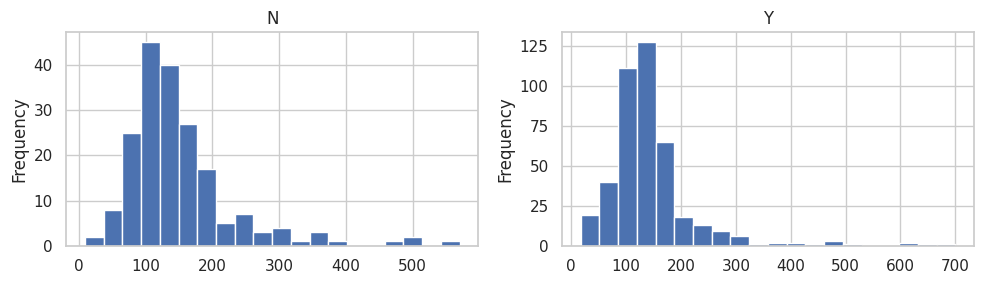

In [39]:
#10
print(df.groupby('Loan_Status')['LoanAmount'].agg(['count','var','std','skew', lambda x: x.kurtosis()]))
fig,ax = plt.subplots(1,2,figsize=(10,3))
for a,(s,g) in zip(ax, df.groupby('Loan_Status')): g['LoanAmount'].plot.hist(bins=20,ax=a); a.set_title(s)
plt.tight_layout(); plt.show()